# Optimization Methods: Assignment 2

## Part 1: written exercises

The exercises are solved in the attached PDF file.

## Part 2: programming problems

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math

### Problem 1: Taylor’s expansion of $sin$ function

In this problem we consider the univariate function $f(x) = sin(x)$.

#### 1. Plot the graph of $f(x)$ for $x ∈ [0, 10]$.

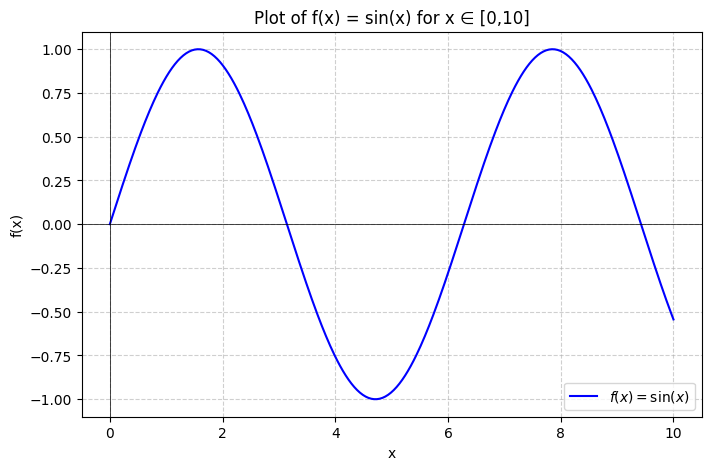

In [3]:
# Define  and plot the function
def f(x):
    return np.sin(x)

x = np.linspace(0, 10, 400)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$f(x) = \sin(x)$', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = sin(x) for x ∈ [0,10]')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

#### 2. What is the k-th order derivative of $f$ for any $k ≥ 0$?

Find its analytical form then write a function that calculates the k-th order derivative of $f$ at any point $x ∈ R$ and for any $k ≥ 0$. Note that the zero-th order derivative corresponds to $f$.

The derivatives of $f(x) = sin(x)$ follow a repeating pattern:

$$
\begin{aligned}
f^{(0)}(x) &= \sin(x) \\
f^{(1)}(x) &= \cos(x) \\
f^{(2)}(x) &= -\sin(x) \\
f^{(3)}(x) &= -\cos(x) \\
f^{(4)}(x) &= \sin(x)
\end{aligned}
$$

The cycle repeats every 4 derivatives, so the k-th derivative of $sin(x)$ can be written as:

$$
f^{(k)}(x) = \sin \left( x + \frac{k\pi}{2} \right)
$$

In [4]:
def kth_derivative_sin(x, k):
    return np.sin(x + (k * np.pi / 2))

# Example
x_value = np.pi / 4
k_value = 3
result = kth_derivative_sin(x_value, k_value)

symbolic_expression = {0: "sin", 1: "cos", 2: "-sin", 3: "-cos"}
k_derivative = symbolic_expression[k_value % 4]
symbolic_x = f"pi/{int(np.pi / x_value)}" if np.pi % x_value == 0 else f"{x_value}"

print(f"The {k_value}-th derivative of sin(x) at x = {symbolic_x} is {k_derivative}({symbolic_x})")
print(f"Symbolic form: The {k_value}-th derivative of sin(x) at x = {x_value} is {result}")

The 3-th derivative of sin(x) at x = pi/4 is -cos(pi/4)
Symbolic form: The 3-th derivative of sin(x) at x = 0.7853981633974483 is -0.7071067811865477


#### 3. Consider the point $ \bar{x} = 0 $.

- (a) Find the form of the tangent line $ t^1(x; \bar{x}) $ of $ f $ at $ \bar{x} $ and plot it on top of the graph of $ f $ for $ x \in [0,10] $. Recall that the tangent line is the first-order Taylor approximation.

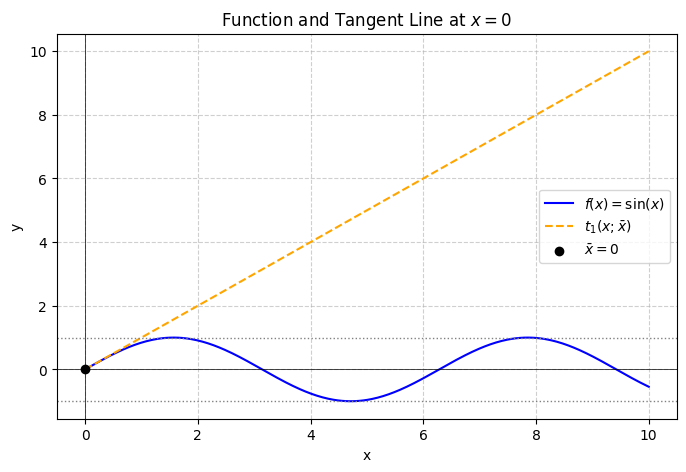

In [5]:
# Derivative of f(x)
def f_derivative(x):
    return np.cos(x)

x_bar = 0

# Tangent line equation (First-order Taylor approximation)
def t1(x, x_bar):
    return f(x_bar) + f_derivative(x_bar) * (x - x_bar)

# Plot
x_values = np.linspace(0, 10, 400)
y_values = f(x_values)
tangent_values = t1(x_values, x_bar)

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label=r'$f(x) = \sin(x)$', color='blue')
plt.plot(x_values, tangent_values, label=r'$t_1(x; \bar{x})$', linestyle='dashed', color='orange')

plt.scatter([x_bar], [f(x_bar)], color='black', zorder=3, label=r'$\bar{x} = 0$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and Tangent Line at $x = 0$')

plt.axhline(1, color='gray', linestyle='dotted', linewidth=1)
plt.axhline(-1, color='gray', linestyle='dotted', linewidth=1)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

- (b) We now want to compute the $ k $-th order Taylor approximation of $ f $ for $ k = 3,5,7,...,19 $. Compute and plot each curve $ t^k(x; \bar{x}) $, $ k = 1,3,5,...,19 $ and the graph of $ f $ for $ x \in [0,10] $ (all curves need to be on the same figure).

$$ t_k(x; \bar{x}) = f(\bar{x}) + \frac{1}{1!} f'( \bar{x} )(x - \bar{x}) + \frac{1}{2!} f^{(2)}( \bar{x} )(x - \bar{x})^2 + \dots + \frac{1}{k!} f^{(k)}( \bar{x} )(x - \bar{x})^k $$

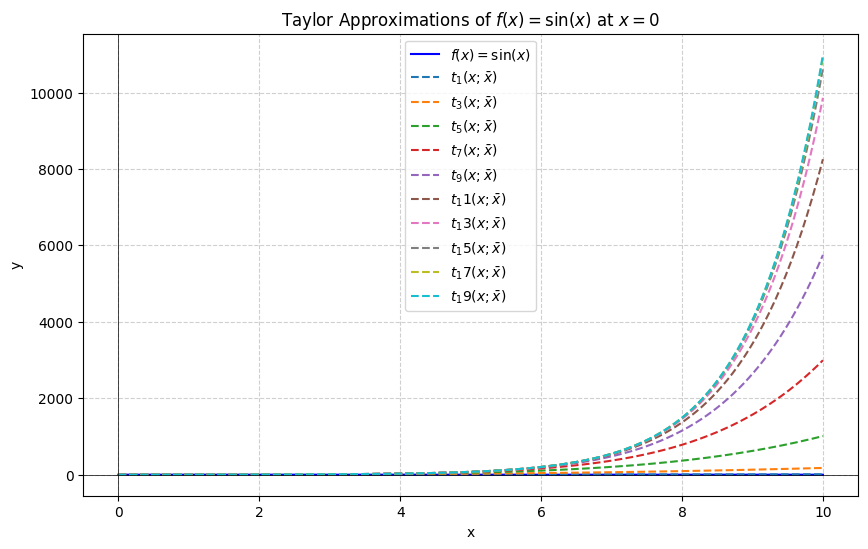

In [6]:
# Taylor approximation function for higher orders
def taylor_approximation(x, x_bar, k):
    approximation = 0
    for n in range(k + 1):
        term = ((-1)**(n % 4 // 2) * np.sin(x_bar + (n % 4) * np.pi / 2) * (x - x_bar)**n) / math.factorial(n) # Computes the k term of the taylor series
        approximation += term
    return approximation

# Define k values for approximation
k_values = list(range(1, 20, 2))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$f(x) = \sin(x)$', color='b')

for k in k_values:
    taylor_values = [taylor_approximation(x, x_bar, k) for x in x_values]
    plt.plot(x_values, taylor_values, linestyle='dashed', label=rf'$t_{k}(x; \bar{{x}})$')

plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Taylor Approximations of $f(x) = \sin(x)$ at $x = 0$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Each dashed line represents a different Taylor approximation, showing how higher-order approximations get closer to the actual function at $ \bar{x} = 0 $.

However, it's very hard to see the difference in accuracy because the lines appear to be all on top of each other. We can try to zoom the plot around $ x = 0 $ so that we can observe clearer how the Taylor approximations improve in precision near $ x = 0 $.

In fact, as the order $ k $ increases, the approximations closely match $ \sin(x) $ within a small interval before diverging.

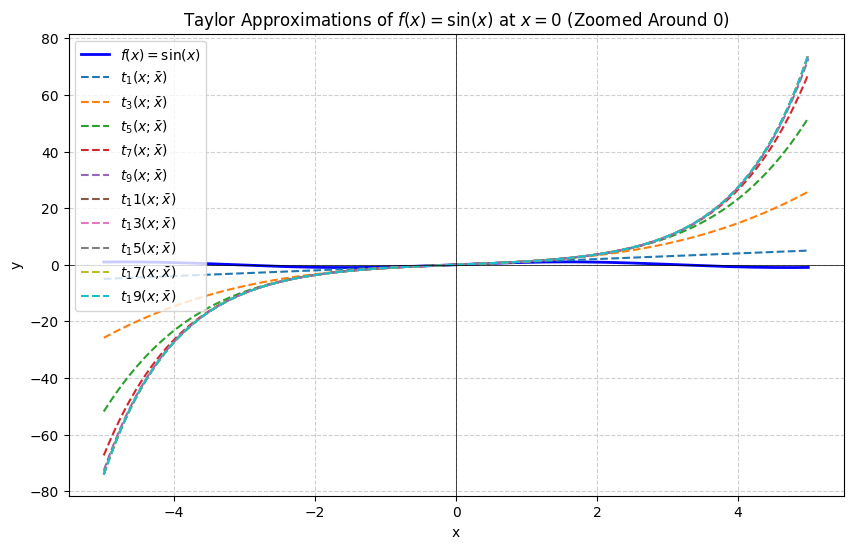

In [7]:
x_values_zoomed = np.linspace(-5, 5, 400)
y_values_zoomed = f(x_values_zoomed)

plt.figure(figsize=(10, 6))
plt.plot(x_values_zoomed, y_values_zoomed, label=r'$f(x) = \sin(x)$', color='b', linewidth=2)

for k in k_values:
    taylor_values = [taylor_approximation(x, x_bar, k) for x in x_values_zoomed]
    plt.plot(x_values_zoomed, taylor_values, linestyle='dashed', label=rf'$t_{k}(x; \bar{{x}})$')

plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Taylor Approximations of $f(x) = \sin(x)$ at $x = 0$ (Zoomed Around 0)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

- (c) Compute the approximation error of $ f $ at $ x= 2 $, using the $ k $-th Taylor approximation of $ f $ at $ \bar{x} = 0 $, for $ k = 1,3,5,...,19 $, i.e., calculate $ | f(x) - t^k(x; \bar{x}) | $ for each $ k $. Put the results in a table and comment.

In [8]:
x_eval = 2

# Compute the approximation error for each k
errors = []
for k in k_values:
    taylor_approx = taylor_approximation(x_eval, x_bar, k)
    error = abs(f(x_eval) - taylor_approx)
    errors.append((k, taylor_approx, error))

# Create and display the table
table_errors = pd.DataFrame(errors, columns=["k", "t_k(2; 0)", "Approximation Error"])
print(table_errors)

    k  t_k(2; 0)  Approximation Error
0   1   2.000000             1.090703
1   3   3.333333             2.424036
2   5   3.600000             2.690703
3   7   3.625397             2.716099
4   9   3.626808             2.717510
5  11   3.626859             2.717562
6  13   3.626860             2.717563
7  15   3.626860             2.717563
8  17   3.626860             2.717563
9  19   3.626860             2.717563


The table provides values for:

- $ k $: The order of the Taylor approximation.
- $ t_k(2;0) $: The Taylor series approximation of $ f(x) = \sin(x) $ evaluated at $ x = 2 $, using a Taylor expansion centered at $ x = 0 $.
- Approximation Error: The absolute difference between the actual function value and the Taylor approximation:

  $$
  \text{Approximation Error} = \left| f(2) - t_k(2; 0) \right|
  $$

$ t_k(2;0) $ is the estimated value of $ \sin(2) $ using a truncated Taylor series of order $ k $, expanded at $ x = 0 $. The Approximation Error tells us how far off the Taylor series approximation is from the true value $ \sin(2) $. A smaller error means a better approximation.

We can see that the approximation starts off poorly (large error for small $ k $):

- For $ k = 1 $, $ t_1(2; 0) = 2.0 $, which is incorrect, and the error is large (≈ 1.09)
- For $ k = 3 $, $ t_3(2; 0) = 3.33 $, which is even worse

However, also higher orders $ k $ are not accurate:

- The approximation seems to converge to ≈ 3.62, but this is not the true value of $ \sin(2) $, which is ≈ 0.909
- Instead of improving, the error stabilizes at around 2.71756

The Taylor series works well near $ x = 0 $, but as $ x $ moves away from 0, higher-order terms don't necessarily improve the accuracy. This happens because the Taylor series is a local approximation and it works well for small values of $ x $ but diverges for large $ x $. Since we expanded the Taylor series around $x = 0$, as $ k $ increases, $ t_k(2;0) $ converges but to the wrong value. This happens because the Taylor series is not good at approximating $ \sin(x) $ far from $ x = 0 $. The error stabilizing at 2.717 suggests that truncating the series at any finite order will never provide a good approximation at $ x = 2 $.

If we want a good approximation for $ \sin(2) $, we should expand the Taylor series at $ x = 2 $, not at $ x = 0 $. In fact, the Taylor series is only a local approximation, and truncating the series doesn't work well at distant points. This means that it only works well near its expansion point. If our goal is to approximate $ f(x) $ around $ x = 2 $, then the best approach would be to expand the Taylor series at $ x = 2 $, not at $ x = 0 $. Expanding at $ x = 0 $ often leads to simpler formulas, which can be computed easily.

However, this exercise is useful because it demonstrates that Taylor series aren't always accurate at far points unless we include infinitely many terms, and the choice of the expansion point matters. So, here we are not trying to get the best approximation but rather to understand the limitations of Taylor series when used far from the expansion point.

### Problem 2: Gradient Descent

In this problem we consider the bivariate function $f(x) = 100(x_2 − x_1^2)^2 + (x_1 − 1)^2$.

#### 1. Define a function that computes $f(x)$ for any $x ∈ R^2$

In [9]:
def f(x1, x2):
    return 100 * (x2 - x1**2)**2 + (x1 - 1)**2

# Example
x1 = 1
x2 = 2
print(f(x1, x2))

100


#### 2. Plot the graph with a contour plot to show the minimum

Plot the graph of $f$ in 2D using contour plots on $[−2,2] × [−2,2]$, then “zoom in” on the minimum and determine its minimum value and optimal variables visually.

Hint: use the contour function in matplotlib.pyplot.

First of all, before doing anything, it's very useful to understand the behaviour of this function. To find the minimum, we need to check where $f(x_1, x_2)$ is the smallest.

- The term $(x_2 - x_1^2)^2$ is always non-negative (it's squared).
- The term $(x_1 - 1)^2$ is also non-negative (it's squared too).

Since we have a multiplication and a sum, the function reaches its smallest possible value when both terms are zero.

- The first term is zero when $x_2 = x_1^2$.
- The second term is zero when $x_1 = 1$.

We can easily conclude that the function reaches its minimum when $x_1 = 1$ and $x_2 = 1$.

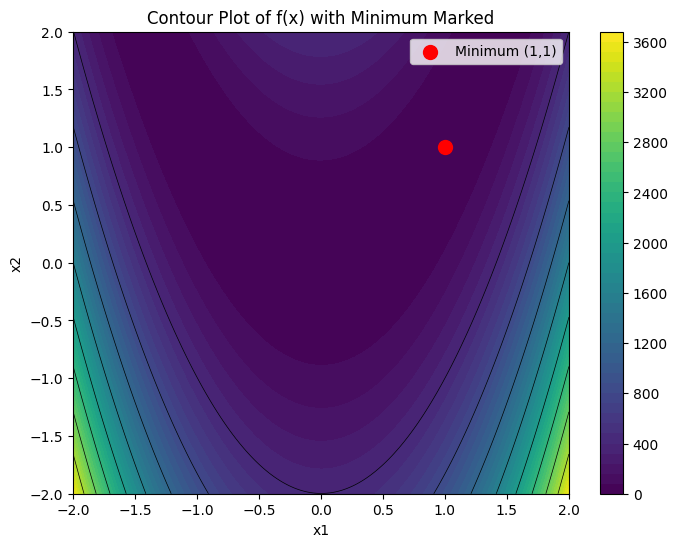

In [10]:
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, Z, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.contour(X1, X2, Z, levels=10, colors='black', linewidths=0.5)
plt.scatter(1, 1, color='red', marker='o', s=100, label="Minimum (1,1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Contour Plot of f(x) with Minimum Marked")
plt.legend()
plt.show()

The contour plot is a way to represent a 3D surface on a 2D plane using contour lines. The color represents function values, the "height" of the function $f(x)$ at each point $(x_1, x_2)$.
​	
- Darker colors typically represent lower values (and so the minimum).
- Brighter colors represent higher values.

However, contour plots show "level curves," not exact points. In fact, each contour line represents a constant function value. The minimum is a single point, but contour lines surround it, making it difficult to see it visually without a marker.

We can zoom in more and we can add a marker to properly see the minimum of the function, which we found being at $(1,1)$.

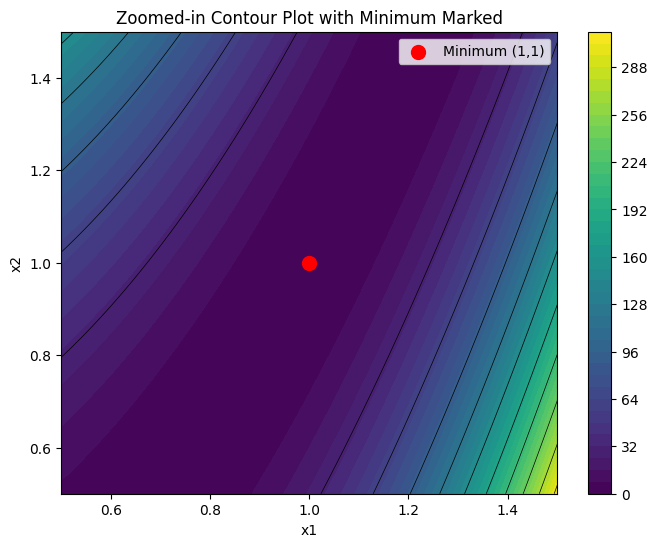

In [11]:
x1_zoom = np.linspace(0.5, 1.5, 400)
x2_zoom = np.linspace(0.5, 1.5, 400)
X1_zoom, X2_zoom = np.meshgrid(x1_zoom, x2_zoom)
Z_zoom = f(X1_zoom, X2_zoom)

plt.figure(figsize=(8, 6))
contour_zoom = plt.contourf(X1_zoom, X2_zoom, Z_zoom, levels=50, cmap="viridis")
plt.colorbar(contour_zoom)
plt.contour(X1_zoom, X2_zoom, Z_zoom, levels=10, colors='black', linewidths=0.5)
plt.scatter(1, 1, color='red', marker='o', s=100, label="Minimum (1,1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Zoomed-in Contour Plot with Minimum Marked")
plt.legend()
plt.show()

We can also zoom in a bit more using a logarithmic scale

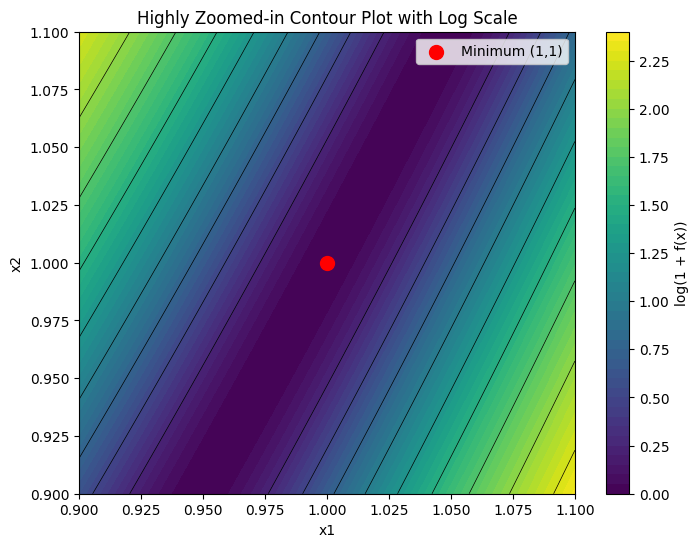

In [12]:
x1_zoom_more = np.linspace(0.9, 1.1, 400)
x2_zoom_more = np.linspace(0.9, 1.1, 400)
X1_zoom_more, X2_zoom_more = np.meshgrid(x1_zoom_more, x2_zoom_more)
Z_zoom_more = f(X1_zoom_more, X2_zoom_more)
Z_zoom_more_log = np.log1p(Z_zoom_more)

plt.figure(figsize=(8, 6))
contour_zoom_more = plt.contourf(X1_zoom_more, X2_zoom_more, Z_zoom_more_log, levels=50, cmap="viridis")
plt.colorbar(contour_zoom_more, label="log(1 + f(x))")
plt.contour(X1_zoom_more, X2_zoom_more, Z_zoom_more_log, levels=10, colors='black', linewidths=0.5)
plt.scatter(1, 1, color='red', marker='o', s=100, label="Minimum (1,1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Highly Zoomed-in Contour Plot with Log Scale")
plt.legend()
plt.show()

#### 3. Plot the graph of f in 3D using contour surface plots. Hint: use the plot surface function in matplotlib.pyplot.

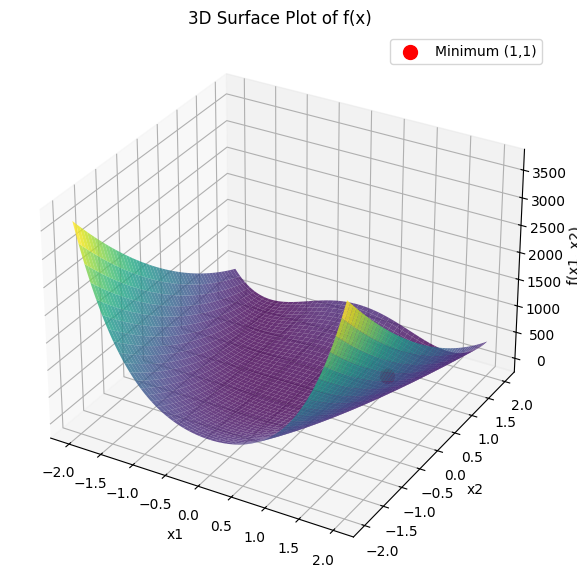

In [13]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap="viridis", alpha=0.8)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.set_title("3D Surface Plot of f(x)")

ax.scatter(1, 1, f(1, 1), color='red', s=100, label="Minimum (1,1)")
ax.legend()

plt.show()

#### 4. Find the analytical form of the gradient of $f$, $∇f(x)$, and define a function $grad_f$ that computes $∇f(x)$ for any $x ∈ R^2$.

To compute the **gradient** of the function $f(x_1, x_2) = 100 (x_2 - x_1^2)^2 + (x_1 - 1)^2$ we need to find the partial derivatives:

$$
\frac{\partial f}{\partial x_1} = 2(x_1 - 1) - 400 x_1 (x_2 - x_1^2)
$$

$$
\frac{\partial f}{\partial x_2} = 200 (x_2 - x_1^2)
$$

And the **gradient** is:

$$
\nabla f(x) =
\begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2}
\end{bmatrix}
=
\begin{bmatrix}
2(x_1 - 1) - 400 x_1 (x_2 - x_1^2) \\
200 (x_2 - x_1^2)
\end{bmatrix}
$$

In [14]:
def grad_f(x):
    x1, x2 = x
    df_dx1 = 2 * (x1 - 1) - 400 * x1 * (x2 - x1**2)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Example
x = np.array([1, 2])
print(f"Gradient of f: {grad_f(x)}")

Gradient of f: [-400  200]


#### 5. Write a function that implements the gradient descent algorithm.

This function should take as input:

- a function $f$ and its gradient $∇f(x)$
- a step size parameter $α$
- a starting point $x$ _start
- a maximum number of iterations maxiter (default value: 1000)
- a tolerance level $ϵ$ for the norm of the gradient (default value: $10^−6$)

Moreover this function should return a list containing all iterates of the gradient descent algorithm.

The Gradient Descent is an iterative optimization algorithm used to minimize a function $f(x)$. The update rule is:

$$
x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)})
$$

where:

- $x^{(k)}$ is the current point.
- $\alpha$ is the step size (learning rate), controlling how big is the step that we take.
- $\nabla f(x)$ is the gradient, indicating the direction of the steepest ascent.
- We move in the opposite direction of the gradient to minimize the function.

Stop if the gradient norm is smaller than a tolerance $\epsilon$: $||\nabla f(x)|| < \epsilon$. This means we are close enough to the minimum. Also stop if we reach the maximum number of iterations.

In [15]:
def gradient_descent(f, grad_f, alpha, x_start, max_iter=1000, epsilon=1e-6):
    x = np.array(x_start, dtype=float)
    iterates = [x.copy()]
    
    for i in range(max_iter):
        grad = grad_f(x)  # Compute the gradient
        if np.linalg.norm(grad) < epsilon:
            break
        x = x - alpha * grad  # Gradient descent update
        iterates.append(x.copy())
    
    return iterates

# Example usage
x_start = np.array([0.5, 2])
alpha = 0.001
iterates = gradient_descent(f, grad_f, alpha, x_start)

print(f"Final solution: {iterates[-1]}")
print(f"Number of iterations: {len(iterates)}")

Final solution: [1.14982275 1.32264038]
Number of iterations: 1001


We can clearly see that even with a small $\alpha$ the algorithm doesn't converge if we start a bit far from the optimal value that is $(1,1)$. Why does this happen?

Our function is similar to the Rosenbrock function, which is not easy to optimize. The valley around the minimum is very narrow, so if the step size is too big, it keeps bouncing around instead of converging.

If $\alpha$ is too large, it overshoots the minimum and oscillates. If $\alpha$ is too small, it moves super slowly and might hit the iteration limit.

Furthermore, the gradient is huge in some areas causing numerical issues.

#### 6. Run the gradient descent algorithm for the function $f$, starting from $x_0$ = $(0.5, 2)^T$ and using a step size $α = 0.001$.

Print the last iterate, plot the trajectory of iterates and comment the results.

From the code above we can see the result:

- Final solution: [1.14982275 1.32264038]
- Number of iterations: 1001

The function didn't converge properly because the maximum number of iterations is too low.

Below we can see the plot of the gradient descent trajectory:

- The red path shows how the algorithm moves step by step towards the minimum.
- The blue dot represents the starting point at $(0.5,2)$.
- The yellow dot represents the final iterate after 1001 iterations.

It looks like the gradient descent is converging, but slowly. The trajectory follows a curved path because the function has a narrow, curved valley.

The function is highly sensitive to small changes in $x_1$, which makes it difficult for gradient descent to move directly to the minimum.

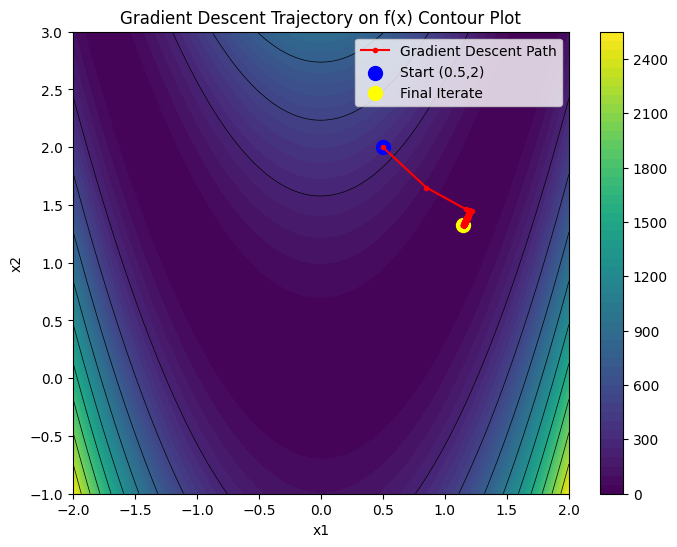

In [16]:
iter_x1 = [x[0] for x in iterates]
iter_x2 = [x[1] for x in iterates]

# Plot the trajectory on the contour plot
x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f(X1, X2)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, Z, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.contour(X1, X2, Z, levels=10, colors='black', linewidths=0.5)

# Plot trajectory
plt.plot(iter_x1, iter_x2, marker='o', markersize=3, color='red', label="Gradient Descent Path")
plt.scatter(iter_x1[0], iter_x2[0], color='blue', marker='o', s=100, label="Start (0.5,2)")
plt.scatter(iter_x1[-1], iter_x2[-1], color='yellow', marker='o', s=100, label="Final Iterate")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Gradient Descent Trajectory on f(x) Contour Plot")
plt.legend()
plt.show()

As I said, the gradient descent is slowly converging.

In fact, if we increase the maximum number of iteration (for example to 50000), we can see that after 31179 iteration we finally reach our minimum:

- Final solution: [1.00000112 1.00000224]
- Number of iterations: 31179

In [17]:
print("Optimization Methods SP25 - Assignment 2")
print("Lorenzo Galli - Università della Svizzera Italiana (USI)")

Optimization Methods SP25 - Assignment 2
Lorenzo Galli - Università della Svizzera Italiana (USI)
